# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

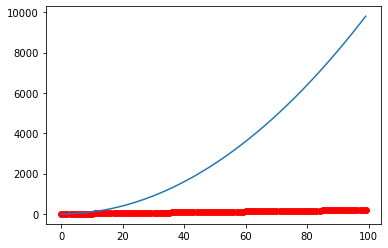

In [3]:
# Method 1
plt.plot(x,y,'ro')
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

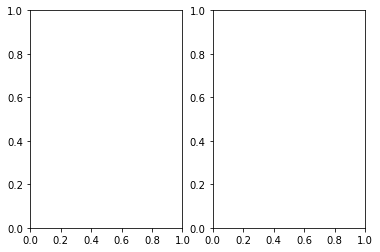

In [4]:
# Method 2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.show()

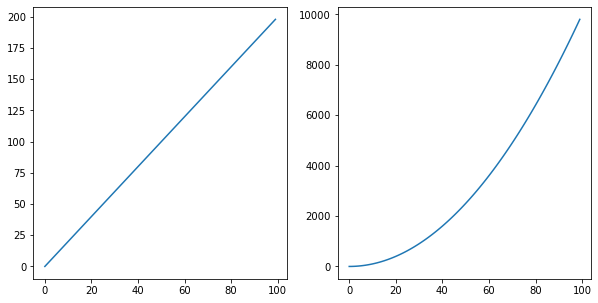

In [5]:
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.plot(x, y)
ax2.plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

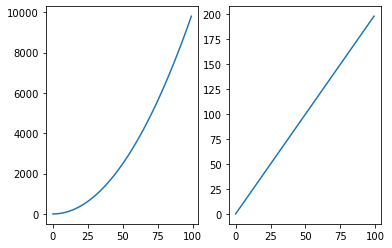

In [6]:
# your code here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x, z)
ax2.plot(x, y)


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [ ]:
# your code here
plt.plot(y,np.exp(y))

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [ ]:
# your code here
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.sample(10)

In [ ]:
fitbit.columns

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [ ]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
plt.bar(fitbit['Months_encoded'],fitbit['Steps'])
plt.figure(figsize = (12,4))
plt.show()
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
plt.bar(fitbit['Work_or_Weekend'],fitbit['Steps'])
plt.figure(figsize = (12,4))
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here

x_col = "Steps"
y_columns = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]


for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(fitbit[x_col], fitbit[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [ ]:
# your code here
titanic = pd.read_csv("titanic.csv")
titanic.sample(10)

#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
# your code here

titanic.dtypes

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(exclude=["object"])

In [ ]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=["object"])

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here



#### Use the right visulalization to show the distribution of column `Age`.

In [ ]:
# your code here

# To display distribuation this histogram is the best beecause with a simple look we can understand that most of the paggeres had. between 20 and 30.

plt.hist(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# your code here

fig,ax = plt.subplots(3,1)

ax[0].hist(titanic['Age'], 10)
ax[1].hist(titanic['Age'], 20)
ax[2].hist(titanic['Age'], 50)



#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

sns.countplot(x='Gender',data=titanic)

In [ ]:
# Method 2 - seaborn
# your code here

plt.hist(titanic["Gender"])

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

sns.countplot(x='Pclass',data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

plt.boxplot(titanic['Age'])

In [ ]:
"""
your comments here

This boxplot shows the most important statistics information such as min, max, median and mean.

"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

The last plot tell us that most of the passengers were between 20 and 30. That the mean was around 29 and we also get informations about the amount of outliers.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

plt.violinplot(titanic['Age'])

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here

We can see more clearly the distribution of the age being most focused at late 20's.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
only_numerics = titanic.select_dtypes(include=numerics)
only_numerics
only_numerics.corr()
plt.matshow(only_numerics.corr())
plt.show()

In [ ]:
# Method 2 - seaborn
# your code here

sns.heatmap(titanic.corr())

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here
titanic.corr()

#### What are the most correlated features?

In [ ]:
"""
your comments here

The most correlated features are 

"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here
sns.catplot(x = 'Pclass', y = 'Age',data = titanic, kind = 'violin')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here

sns.boxplot(data=titanic, x='Gender', y='Age')